In [164]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd
df_LetalCars = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
df_LetalCars.head(3)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


In [165]:
df_LetalCars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

제안 5: 신용 등급에 따른 위험 관리
- 문제 정의: 고객의 신용 등급에 따른 위험을 분석하여, 신용 등급이 낮은 고객에 대한 위험 관리 전략을 수립합니다.
- 배경: 신용 등급별 위험 프로필을 이해함으로써, 신용 위험이 높은 고객에 대해 적절한 관리 전략을 개발할 수 있습니다.

### 신용등급 분포 확인
- 가장 많은 신용등급 1 > 2 > 4 > 3 > 5 > 6 > 7 > 8 > 9 > 10 , 0(nan 값)은 3등급에 합산

In [166]:
df_LetalCars['credit rating'].unique() #종류

array([ 9.,  2.,  8.,  5.,  1.,  7., nan,  3.,  6.,  4., 10.,  0.])

In [167]:
df_LetalCars['credit rating'].value_counts() # 신용등급 분포도

credit rating
1.0     10778
2.0      8228
4.0      5379
3.0      4997
5.0      4317
6.0      3818
7.0      2717
8.0      1542
9.0       639
0.0        60
10.0       46
Name: count, dtype: int64

In [168]:
df_LetalCars['credit rating'].describe()

count    42521.000000
mean         3.428894
std          2.213590
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         10.000000
Name: credit rating, dtype: float64

In [169]:
# 0.0 신용등급 평균 등급으로 합산 
condition = df_LetalCars['credit rating'] == 0.0
zero_credit_rating = df_LetalCars[condition].shape[0] # shape은 데이터의 크기를 반환하는 함수 0은 행 1은 열
zero_credit_rating # 0.0 신용등급 갯 수 확인

60

In [170]:
# 신용등급 0.0을 3.0으로 수정
df_LetalCars.loc[condition, 'credit rating'] = 3.0 #loc을 사용해 해당 0.0등급을 3.0등급으로 변경
df_LetalCars['credit rating'].value_counts() # 0.0등급 3.0등급과 합산확인 굳이 변수에 따로 담지 않음.

credit rating
1.0     10778
2.0      8228
4.0      5379
3.0      5057
5.0      4317
6.0      3818
7.0      2717
8.0      1542
9.0       639
10.0       46
Name: count, dtype: int64

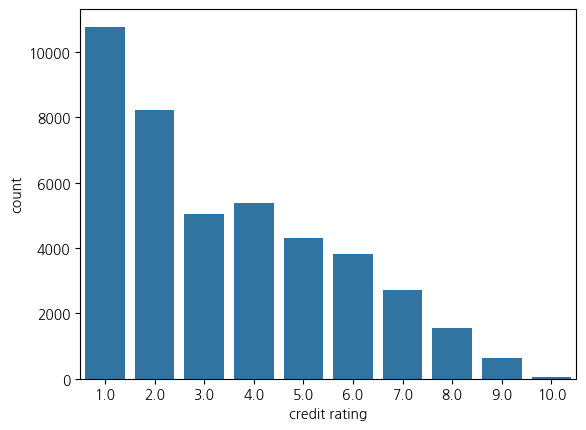

In [171]:
sns.countplot(data = df_LetalCars, x = 'credit rating')
plt.show()

### 나이별 신용등급 분포 확인
- 기준 1 (나이)
    + 신용등급이 가장 낮을 것 같은 연령대 : 20대 이상 80대 이하

- 기준 2 (신용 등급)
    + 신용등급 : 1 ~ 10
  
- 확인 방법
    + 기준 1에 해당되는 데이터를 가지고 기준 2에 해당하는 항목 매칭
    + 기준별 차트 출력

- 인사이트 : 신용등급 9.0등급을 제외한 나머지 모든 등급에서 40대가 가장 많음 40대에게 혜택을 주어 등급을 올릴 수 있게 유도

In [172]:
# 기준 1 (나이)
conditions_age = '20 <= age < 80'

# 기준 2 (신용등급)
conditions_1 = '`credit rating` == 1.0'
conditions_2 = '`credit rating` == 2.0'
conditions_3 = '`credit rating` == 3.0'
conditions_4 = '`credit rating` == 4.0'
conditions_5 = '`credit rating` == 5.0'
conditions_6 = '`credit rating` == 6.0'
conditions_7 = '`credit rating` == 7.0'
conditions_8 = '`credit rating` == 8.0'
conditions_9 = '`credit rating` == 9.0'
conditions_10 = '`credit rating` == 10.0'

In [173]:
# 연령별 신용등급 분포
df_LetalCars_age_1 = df_LetalCars.query(f"{conditions_age} and {conditions_1}")
df_LetalCars_age_2 = df_LetalCars.query(f"{conditions_age} and {conditions_2}")
df_LetalCars_age_3 = df_LetalCars.query(f"{conditions_age} and {conditions_3}")
df_LetalCars_age_4 = df_LetalCars.query(f"{conditions_age} and {conditions_4}")
df_LetalCars_age_5 = df_LetalCars.query(f"{conditions_age} and {conditions_5}")
df_LetalCars_age_6 = df_LetalCars.query(f"{conditions_age} and {conditions_6}")
df_LetalCars_age_7 = df_LetalCars.query(f"{conditions_age} and {conditions_7}")
df_LetalCars_age_8 = df_LetalCars.query(f"{conditions_age} and {conditions_8}")
df_LetalCars_age_9 = df_LetalCars.query(f"{conditions_age} and {conditions_9}")
df_LetalCars_age_10 = df_LetalCars.query(f"{conditions_age} and {conditions_10}")

In [174]:
#연령별 1.0 신용등급 분포
bins = [20,30,40,50,60,70,80]
labels = ['20-29','30-39','40-49','50-59','60-69','70-79']
df_LetalCars_age_1['age_group'] = pd.cut(df_LetalCars_age_1['age'], bins=bins, labels=labels)
df_LetalCars_age_2['age_group'] = pd.cut(df_LetalCars_age_2['age'], bins=bins, labels=labels)
df_LetalCars_age_3['age_group'] = pd.cut(df_LetalCars_age_3['age'], bins=bins, labels=labels)
df_LetalCars_age_4['age_group'] = pd.cut(df_LetalCars_age_4['age'], bins=bins, labels=labels)
df_LetalCars_age_5['age_group'] = pd.cut(df_LetalCars_age_5['age'], bins=bins, labels=labels)
df_LetalCars_age_6['age_group'] = pd.cut(df_LetalCars_age_6['age'], bins=bins, labels=labels)
df_LetalCars_age_7['age_group'] = pd.cut(df_LetalCars_age_7['age'], bins=bins, labels=labels)
df_LetalCars_age_8['age_group'] = pd.cut(df_LetalCars_age_8['age'], bins=bins, labels=labels)
df_LetalCars_age_9['age_group'] = pd.cut(df_LetalCars_age_9['age'], bins=bins, labels=labels)
df_LetalCars_age_10['age_group'] = pd.cut(df_LetalCars_age_10['age'], bins=bins, labels=labels)

# df_LetalCars_age_10.head(3)

/tmp/ipykernel_90207/612411842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LetalCars_age_1['age_group'] = pd.cut(df_LetalCars_age_1['age'], bins=bins, labels=labels)
/tmp/ipykernel_90207/612411842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LetalCars_age_2['age_group'] = pd.cut(df_LetalCars_age_2['age'], bins=bins, labels=labels)
/tmp/ipykernel_90207/612411842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [175]:
# 신용등급 1.0
df_LetalCars_age_1['age_group'].value_counts()


age_group
40-49    2809
30-39    2387
50-59    2199
20-29    1231
60-69    1115
70-79     370
Name: count, dtype: int64

In [176]:
# 신용등급 2.0
df_LetalCars_age_2['age_group'].value_counts()

age_group
40-49    2138
30-39    1799
50-59    1708
20-29     922
60-69     860
70-79     282
Name: count, dtype: int64

In [177]:
# 신용등급 3.0
df_LetalCars_age_3['age_group'].value_counts()

age_group
40-49    1310
30-39    1109
50-59    1047
20-29     595
60-69     566
70-79     147
Name: count, dtype: int64

In [178]:
# 신용등급 4.0
df_LetalCars_age_4['age_group'].value_counts()

age_group
40-49    1440
30-39    1126
50-59    1104
60-69     612
20-29     605
70-79     189
Name: count, dtype: int64

In [179]:
# 신용등급 5.0
df_LetalCars_age_5['age_group'].value_counts()

age_group
40-49    1136
30-39     926
50-59     880
20-29     511
60-69     455
70-79     159
Name: count, dtype: int64

In [180]:
# 신용등급 6.0
df_LetalCars_age_6['age_group'].value_counts()

age_group
40-49    948
30-39    839
50-59    797
60-69    432
20-29    424
70-79    127
Name: count, dtype: int64

In [181]:
# 신용등급 7.0
df_LetalCars_age_7['age_group'].value_counts()

age_group
40-49    680
30-39    594
50-59    593
60-69    304
20-29    291
70-79     92
Name: count, dtype: int64

In [182]:
# 신용등급 8.0
df_LetalCars_age_8['age_group'].value_counts()

age_group
40-49    404
50-59    343
30-39    317
20-29    176
60-69    167
70-79     38
Name: count, dtype: int64

In [183]:
# 신용등급 9.0
df_LetalCars_age_9['age_group'].value_counts()

age_group
30-39    156
40-49    152
50-59    141
20-29     65
60-69     63
70-79     23
Name: count, dtype: int64

In [184]:
# 신용등급 10.0
df_LetalCars_age_10['age_group'].value_counts()

age_group
40-49    15
50-59    10
30-39     9
20-29     5
60-69     4
70-79     2
Name: count, dtype: int64